<a href="https://colab.research.google.com/github/FelixMedrano/Intro-to-artificial-intelligence/blob/main/Module_08_machine_learning/CAP4630_A4_Starter_medranof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header

Felix Medrano 7/20/2021 COP4630 Intro to Ai

Assignment 4



# CAP 4630 - Intro to AI
## Assignment 4
## Flower classification using machine learning techniques
This is a simple example of a 3-class classifier using the Fisher's Iris dataset.


This is starting code and the colab link can be found at

https://colab.research.google.com/drive/1HHsBk7SZwJnf-2TrS7i1wKpuMvexhImV?usp=sharing

Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data. 

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. 

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. 

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### TODO 2

Write code to generate a pair plot for the Iris dataset.

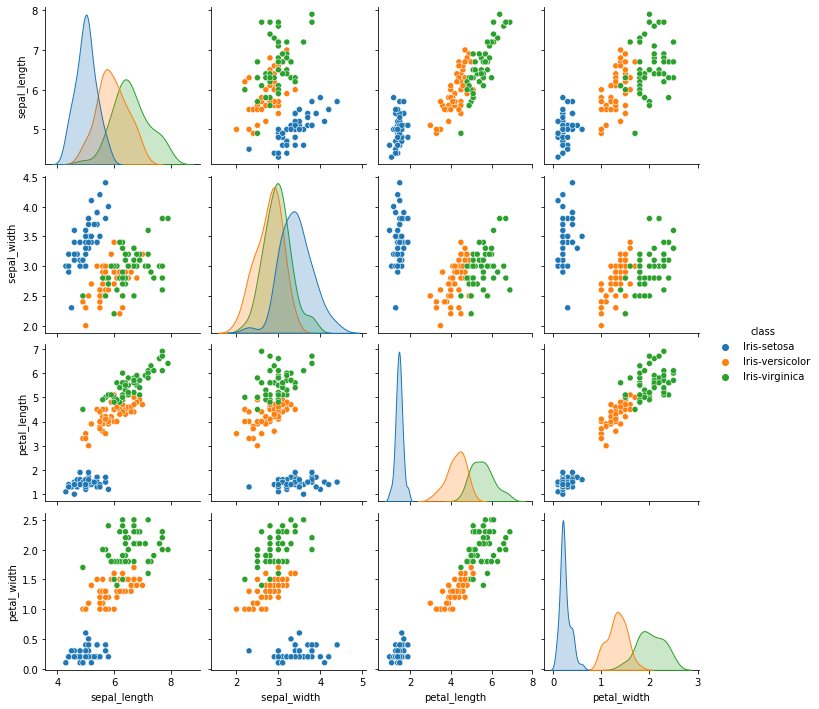

In [ ]:
# ENTER YOUR CODE HERE
#SOURCE
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
#This plots all the graphs and hue establishes how to seperate the data to make more readable
sns.pairplot(iris, hue="class")


## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. 

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. 

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['class_encod']] # target attributes 

X = iris.iloc[:, 0:4] # input attributes
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()



,class_encod
0,0
1,0
2,0
3,0
4,0


### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
# ENTER YOUR CODE HERE

#Inspiration for this solution came from the following link
#https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/
from sklearn.preprocessing import MinMaxScaler
#Function to normalize between 0-1
scaler=MinMaxScaler(feature_range=(0, 1))
#Sets X to a numpy array so it can be normalized
X=scaler.fit_transform(X.to_numpy())
#sets x back to a panda dataframe with the correct columns
X= pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X.describe() # Comment out this line to check your results against the screenshot in the guidelines.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. 

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn. 

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance. 

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset. 

In [ ]:
m.score(X_test, y_test)

0.9777777777777777

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified. 

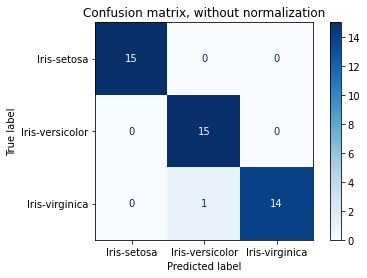

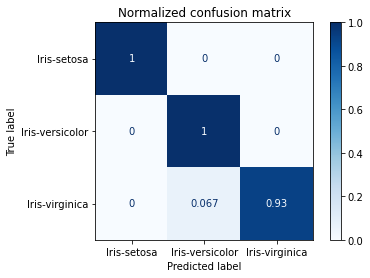

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Save the model for later use

We might want to save our model for later use. 

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [ ]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### 4.2 Decision tree classifier


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn. 

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices, save the model to a file for later use, load it from file and confirm that it's working.


In [ ]:
# ENTER YOUR CODE HERE
#Creating a Decision Tree is all the same steps as 4.1. Changed some of the variable names to avoid confusion
from sklearn.tree import DecisionTreeClassifier
n = DecisionTreeClassifier()
n.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Once the model is built, we can use the predict() method to calculate the predicted category of a instance.

In this case, we want to predict the class of the first 10 lines of the X_test dataset. The return is an array containing the estimated categories.

In [ ]:
n.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like score() and confusion_matrix() to measure the performance of our model.

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset.

In [ ]:
n.score(X_test, y_test)

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified.

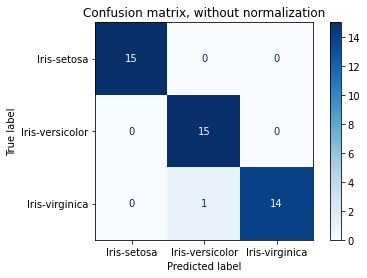

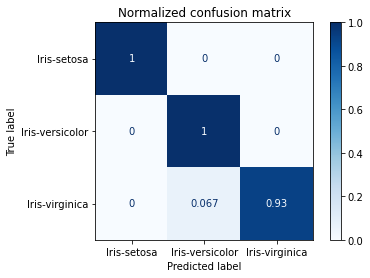

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(n, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

We might want to save our model for later use.

For example, we could embed our model into a webservice or mobile application. So we use the method dump() from the joblib package to save the model to a file.

In [ ]:
dump(n, 'iris-classifier-n.dmp')

['iris-classifier-n.dmp']

In [ ]:

ic = load('iris-classifier-n.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

[Text(558.0, 978.48, 'petal_width <= 0.292\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = y[0]'),
 Text(472.15384615384613, 761.0400000000001, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = y[0]'),
 Text(643.8461538461538, 761.0400000000001, 'petal_width <= 0.688\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = y[1]'),
 Text(343.38461538461536, 543.6, 'petal_length <= 0.669\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = y[1]'),
 Text(171.69230769230768, 326.1600000000001, 'petal_width <= 0.646\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = y[1]'),
 Text(85.84615384615384, 108.72000000000003, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = y[1]'),
 Text(257.53846153846155, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = y[2]'),
 Text(515.0769230769231, 326.1600000000001, 'petal_width <= 0.604\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = y[1]'),
 Text(429.23076923076917, 108.72000000000003, 'gini = 0.

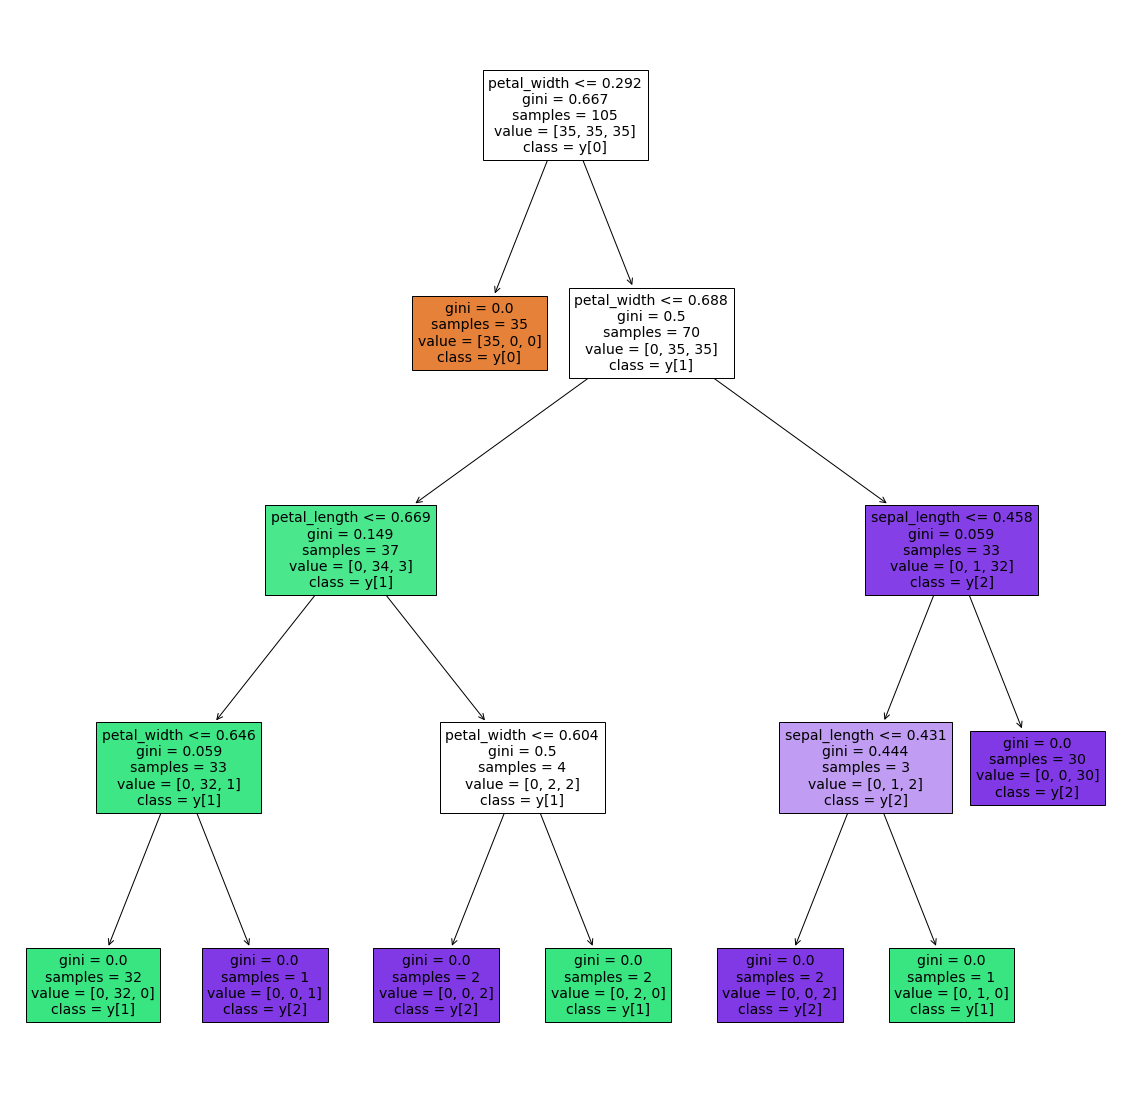

In [ ]:
from sklearn import tree
#SOURCE
#https://scikit-learn.org/stable/modules/tree.html
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(clf, 
                   feature_names=columns,  
                   class_names=True,
                   filled=True)

## Project Notes

**The Assignment**

Work on the iris dataset using machine learning, more specifically flower classification.

**Roles and Planning**

This assignment was completed alone, I served as the architect, developer and reporter. This assignment had a starter code to work with, with only 3 sections for us to program in. It went over the basic concepts of machine learning and how we may prepare the data given to use for the machine learning algorithm to work with. To start off I briefly looked over the guidelines and then watched the youtube video that would provide insight into the assignment. I copied the colab notebook and began looking and exploring the assignment and followed along with the video. For the first section of programming I had to create a pair plot for the iris dataset. This I knew would be simple since the professor mentioned that we would only need 1 line of code. After some careful searching I was able to find a way to create what I needed (https://seaborn.pydata.org/generated/seaborn.pairplot.html). This brought me to a page where someone had created exactly what I needed. After figuring out what I needed to change so the function could read the iris dataset I was done with the first part. Once I moved on to the second part I realized that it would be a lot more difficult and I would need to do a lot more research. After checking out different links and understanding more what the existing code does, I was able to piece together a solution using code from the following link as inspiration (https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/ ) Here I was able to see that the minmaxscaler had other functions such as fit and fit_transform, furthermore I saw how these functions could not be passed a dataframe. Instead, I had to convert the dataframe into a numpy array to apply the fit function. And then would need to be converted back into a dataframe using the name of the columns to help organize the information. After doing this I was able to see how the data was normalized and would be ready to pass to the algorithm. Part 3 according to the video provided we would need to copy the code from section 4.1 and change out the function call to a decision tree classifier function that I imported in. After copying the code that would train X and y I imported  a library called tree from sklearn and passed 
The trained data as well as adjusted the size and columns and finally printed out the decision tree. I noticed that when the tree printed it printed out the raw text for the tree and tried to find a way to not print the raw data. However, after some research I was unable to find a way for the raw text to not be output. For future improvements I would definitely try to figure out a different way to output the information without the raw text.


## CONCLUSION
In Conclusion this assignment was very useful in teaching how machine learning can be used for classification. Furthermore, we can see how important the different parts such as preprocessing the data is. This assignment was great for getting a better understanding of dataframes and how they can be implemented into machine learning algorithms. Additionally, this assignment provided a great way to see how the information in a learning algorithm flows and how every step is necessary to building a good machine learning algorithm.  

**Lesson Learned**

This assignment was very useful in teaching the basic concepts of machine learning using the iris dataset. We were able to see first hand how important preparing the data can be and see different algorithm types and how they produce the same results. This assignment was very similar to the examples demonstrated in the textbook and it was very simple to relate ideas explained in the book to this assignment 


# README
This python file may be accessed through google colab and only requires a device with internet access